Let's vizualize the sequence of observations from a spot in the sky.  

In [1]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db

In [2]:
runName = 'baseline2018a'

opsdb = db.OpsimDatabase(runName + '.db')

mjdcol = 'observationStartMJD'
degrees = True

outDir = 'Transients'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
metric=metrics.PassMetric(cols=[mjdcol, 'fiveSigmaDepth', 'filter'])
ra = [0.]
dec = [-30. if degrees else np.radians(-30.)]
slicer = slicers.UserPointsSlicer(ra=ra,dec=dec)
sqlconstraint = 'night < 365'

In [4]:
bundle = metricBundles.MetricBundle(
    metric, slicer, sqlconstraint, runName=runName)
bgroup = metricBundles.MetricBundleGroup(
    {0: bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with constraint night < 365 for columns ['filter', 'fieldRA', 'fiveSigmaDepth', 'observationStartMJD', 'fieldDec']
Found 227468 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [5]:
filters = np.unique(bundle.metricValues[0]['filter'])
colors = {'u': 'b','g': 'g','r': 'r',
          'i': 'purple',"z": 'y',"y": 'magenta'}

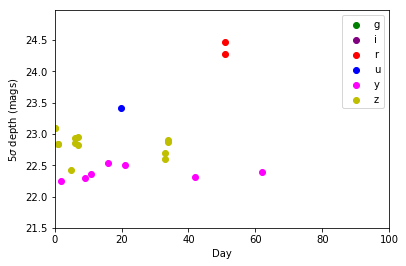

In [6]:
mv = bundle.metricValues[0]
for filterName in filters:
    good = np.where(mv['filter'] == filterName)
    plt.scatter(mv[mjdcol][good]-mv[mjdcol].min(),
                mv['fiveSigmaDepth'][good],
                c=colors[filterName], label=filterName)
plt.xlabel('Day')
plt.ylabel('5$\sigma$ depth (mags)')
plt.xlim([0,100])
plt.legend(scatterpoints=1)